In [1]:
#https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import training_configs

In [2]:
config= training_configs.efficientNetB2_config
df = pd.read_csv(config.train_csv)
df.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,0005f7aaab2800f6170c399693a96917_0,karolinska,0,0+0
2,0005f7aaab2800f6170c399693a96917_1,karolinska,0,0+0
3,0005f7aaab2800f6170c399693a96917_2,karolinska,0,0+0
4,0005f7aaab2800f6170c399693a96917_3,karolinska,0,0+0


In [3]:
df = df.sample(frac=1).reset_index(drop=True)

n=1000

df0=df[df['isup_grade']==0]
df1=df[df['isup_grade']==1]
df2=df[df['isup_grade']==2]
df3=df[df['isup_grade']==3]
df4=df[df['isup_grade']==4]
df5=df[df['isup_grade']==5]

df_test= pd.DataFrame()
df_test= df_test.append(df0[:n])
df_test= df_test.append(df1[:n])
df_test= df_test.append(df2[:n])
df_test= df_test.append(df3[:n])
df_test= df_test.append(df4[:n])
df_test= df_test.append(df5[:n])
df_test.shape

(6000, 4)

In [4]:
df_test.head()

,image_id,data_provider,isup_grade,gleason_score
0,99c6fe26241ccf3a84ef771506d99fa2_1,karolinska,0,0+0
6,8f390d3f70eb8c12b3e56bb1976c71dc_0,karolinska,0,0+0
8,3431b6b189e8547fb02ced891b4201b4_0,karolinska,0,0+0
9,c4cde1827d4895957ca8507e37a3cf76_3,radboud,0,negative
10,c166cd559ecbd36762004e302c2a3d0c_0,karolinska,0,0+0


In [5]:
import tensorflow as tf
import tensorflow_addons
model=tf.keras.models.load_model("modelcheckpoints/{}/{}_full.h5".format(config.train_data_name,config.model_name))
#print(model.summary())

In [6]:
y=df_test['isup_grade']
y_pred= []

side = int(config.num_tiles ** 0.5)
input_size=(config.img_size*side,config.img_size*side,3) 
for image in df_test['image_id']:
        img_path = '{}/{}.png'.format(config.backbone_train_path, image)
        image= tf.keras.preprocessing.image.load_img(path=img_path,grayscale=False,color_mode="rgb",target_size=(config.img_size*side,config.img_size*side),interpolation='nearest')
        input=tf.keras.preprocessing.image.img_to_array(image)
        if(input.shape!=input_size):
            input=cv2.resize(input,input_size,interpolation=cv2.INTER_LANCZOS4)
        X=np.expand_dims(input/255.0, axis=0)
        prediction= model.predict(X)
        y_pred.append(np.argmax(prediction[0]))

1/1 [==============================] - 0s 28ms/step


In [7]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y,y_pred)

In [8]:
cm_df= pd.DataFrame(cm)


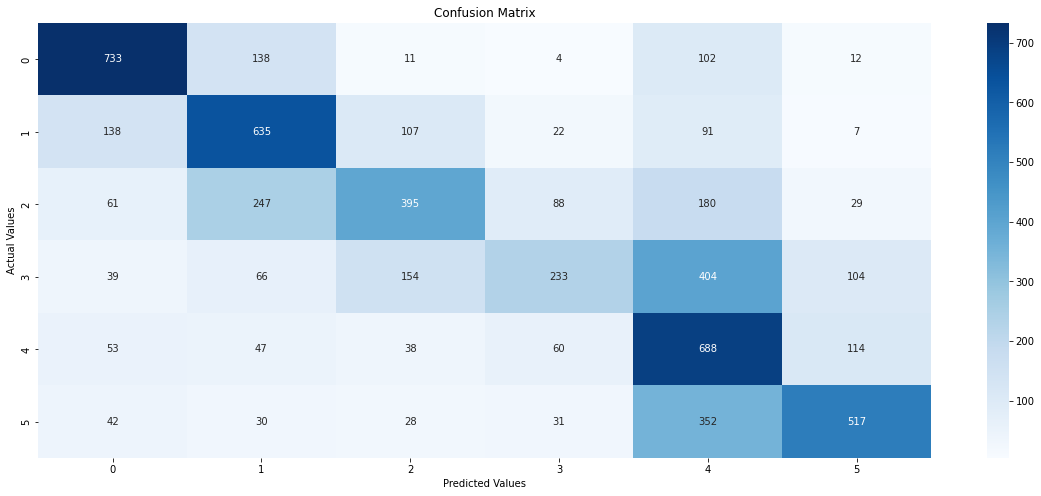

In [9]:
plt.figure(figsize=(20,8))
sns.heatmap(cm_df, annot=True, fmt='.4g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [10]:
from sklearn import metrics

print(metrics.classification_report(y,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.688     0.733     0.710      1000
           1      0.546     0.635     0.587      1000
           2      0.539     0.395     0.456      1000
           3      0.532     0.233     0.324      1000
           4      0.379     0.688     0.488      1000
           5      0.660     0.517     0.580      1000

    accuracy                          0.533      6000
   macro avg      0.557     0.533     0.524      6000
weighted avg      0.557     0.533     0.524      6000

